# **YOLOV8 Crack Detection Model**

## **Initial Setup**

Initial setup involve downloading and installing the ultralytics library which contains yolov8. The Ultralytics library is an open-source collection of machine learning models, software, and utilities designed for object detection tasks, centered around the YOLO (You Only Look Once) algorithms. YOLOv8, one of the most recent installments from Ultralytics, is an advanced object detection model specifically designed for speed and accuracy of real-time object detection. The Utlralytics library and yolov8 model are built on top of the PyTorch deep learning framework. The libary makes it easy to train, test, and deploy object detection models, compared to the traditional (and significantly more difficult) PyTorch workflow.

The following code block installs the Ultralytics library and downloads the yolov8 model.

**References:** <br>
[Ultralytics GitHub](https://github.com/ultralytics/ultralytics) <br>
[Ultralytics YOLOv8 Documentaion](https://docs.ultralytics.com/)

In [3]:
%pip install ultralytics==8.0.196

# Imports
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196  Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Setup complete  (12 CPUs, 63.7 GB RAM, 988.8/1862.3 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

### **Roboflow Installation**

Roboflow is a data management platform that allows you to upload, organize, and preprocess your data for machine learning. For the purposes of this project, Roboflow was used to download the crack detection dataset. The dataset was then converted to the YOLO format and uploaded to the Ultralytics library for training.

The following code block installs the Roboflow library amd downloads the crack detection dataset.

**References:** <br>
[Roboflow Documentation](https://docs.roboflow.com/) <br>
[Roboflow Crack Detection Dataset](https://universe.roboflow.com/university-bswxt/crack-bphdr)

In [5]:
from roboflow import Roboflow
rf = Roboflow(api_key="nJMTmuFQKhTA2Pdmj9xW")
project = rf.workspace("university-bswxt").project("crack-bphdr")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## **Training on a Custom Datatset**

Using the Roboflow library, the crack detection dataset was downloaded and converted to the YOLO format. The dataset was then uploaded to the Ultralytics library for training.

### **Training the Model**

The training process is inititated by the following terminal command. The command sets the task to `detect` and the mode to `train`. This means that the model will be trained for task of object detection. The model is initialized using `yolov8s.pt`, which is a pretrained model file. The dataset is specified using the `--data` flag, which points to the `crack.yaml` file. The number of epochs is set to 30 and image size is set to 800 pixels. It is common practice is to start with a smaller image size and increase it as needed. Please note that the output for the training process is truncated in this notebook for brevity the full output is not shown.

In [1]:
!yolo task=detect mode=train model=yolov8s.pt data="C:\\Users\\Marcus\\Desktop\\Share Folder\\Yolov8\\crack-2\\data.yaml" epochs=30 imgsz=800 plots=True

New https://pypi.org/project/ultralytics/8.2.2 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=C:\\Users\\Marcus\\Desktop\\Share Folder\\Yolov8\\crack-2\\data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=Fa

| Command Part                               | Explanation                                                         |
|--------------------------------------------|---------------------------------------------------------------------|
| `!yolo`                                    | This signifies a shell command in environments like Jupyter Notebooks. It calls the YOLO CLI. |
| `task=detect`                              | Specifies the task to be performed by YOLO, which in this case is object detection. |
| `mode=train`                               | Sets the mode to 'train', indicating that the model should be trained. |
| `model=yolov8s.pt`                         | Specifies the model file to be used, in this case, 'yolov8s.pt', which likely stands for a specific variant of YOLOv8. |
| `data={dataset.location}/data.yaml`        | Points to the data configuration file, which includes paths to the training and validation datasets, as well as class definitions. |
| `epochs=30`                                | Sets the number of training epochs to 30. An epoch is a complete pass over the entire dataset. |
| `imgsz=800`                                | Sets the image size (width and height) for training to 800 pixels. |
| `plots=True`                               | Enables the generation of plots during training, such as loss curves and performance metrics. |

   ### **Training Output**
   
   List the files generated in `runs\detect\train15`. These are files show relevant data pertaining to the accuracy and loss of the trained model, among other important metrics for further evaluation and improvement, if desired.

   Note: The `train15` in the file path refers to the 15th training run. This number will increment with each new training run. The files generated in this directory are crucial for evaluating the performance of the trained model and making decisions about further training or adjustments to the model architecture. We are on the 15th training run due to several failed attempts to train the model, mostly due to misconofigurations. 

In [2]:
!dir runs\detect\train2\

 Volume in drive C has no label.
 Volume Serial Number is 1C5A-ED5E

 Directory of c:\Users\Marcus\Desktop\Share Folder\Yolov8\runs\detect\train2

04/20/2024  05:25 PM    <DIR>          .
04/20/2024  04:53 PM    <DIR>          ..
04/20/2024  04:51 PM             1,546 args.yaml
04/20/2024  05:25 PM            88,552 confusion_matrix.png
04/20/2024  05:25 PM            87,532 confusion_matrix_normalized.png
04/20/2024  05:25 PM           103,113 F1_curve.png
04/20/2024  04:52 PM           281,045 labels.jpg
04/20/2024  04:52 PM           219,141 labels_correlogram.jpg
04/20/2024  05:25 PM            89,138 PR_curve.png
04/20/2024  05:25 PM            98,808 P_curve.png
04/20/2024  05:25 PM            10,447 results.csv
04/20/2024  05:25 PM           285,243 results.png
04/20/2024  05:25 PM           100,297 R_curve.png
04/20/2024  04:52 PM           546,129 train_batch0.jpg
04/20/2024  04:52 PM           505,473 train_batch1.jpg
04/20/2024  04:52 PM           512,361 train_batch2.jpg
04

### **Confusion Matrix**

The confusion matrix displayed in the image is a tool used to evaluate the performance the crack identification model. Here's a breakdown of each element:

- True Positives: The top left (dark blue) square represents the true positives, where the model correctly identifies the presence of cracks. Here, there are 205 instances where the model successfully detected cracks that are indeed there.
- False Negatives: The bottom left (lighter blue) square represents false negatives, where the model incorrectly predicts the absence of cracks when they are actually present. There are 44 instances of such errors.
- False Positives: The top right (lighter blue) square next to the TP represents false positives, where the model predicts cracks, but none are present. The model made 82 such errors.
- True Negatives: The bottom right (white) square, which appears to be white due to the low or zero (and thus low intensity of the color), represents the true negatives, where the model correctly identifies that there are no cracks. The number here isn't visible, indicating that the number is neglible or zero. 

The goal in a well-performing crack identification model is to maximize the number of true positives (correctly identified cracks) and true negatives (correctly identified non-crack areas), while minimizing the number of false positives and false negatives. High numbers of false negatives could mean that the model is missing critical cracks, while high numbers of false positives could lead to unnecessary inspections or repairs.

In terms of the YOLOv8 training, the confusion matrix suggests that the model is relatively good at detecting cracks (given the 205 true positives), but improvements could be made to reduce both false negatives and false positives to make the model more reliable. This could involve additional training data, using a larger yolov8 base model, adjusting the confidence thresholds, or increasing the number of training epochs.

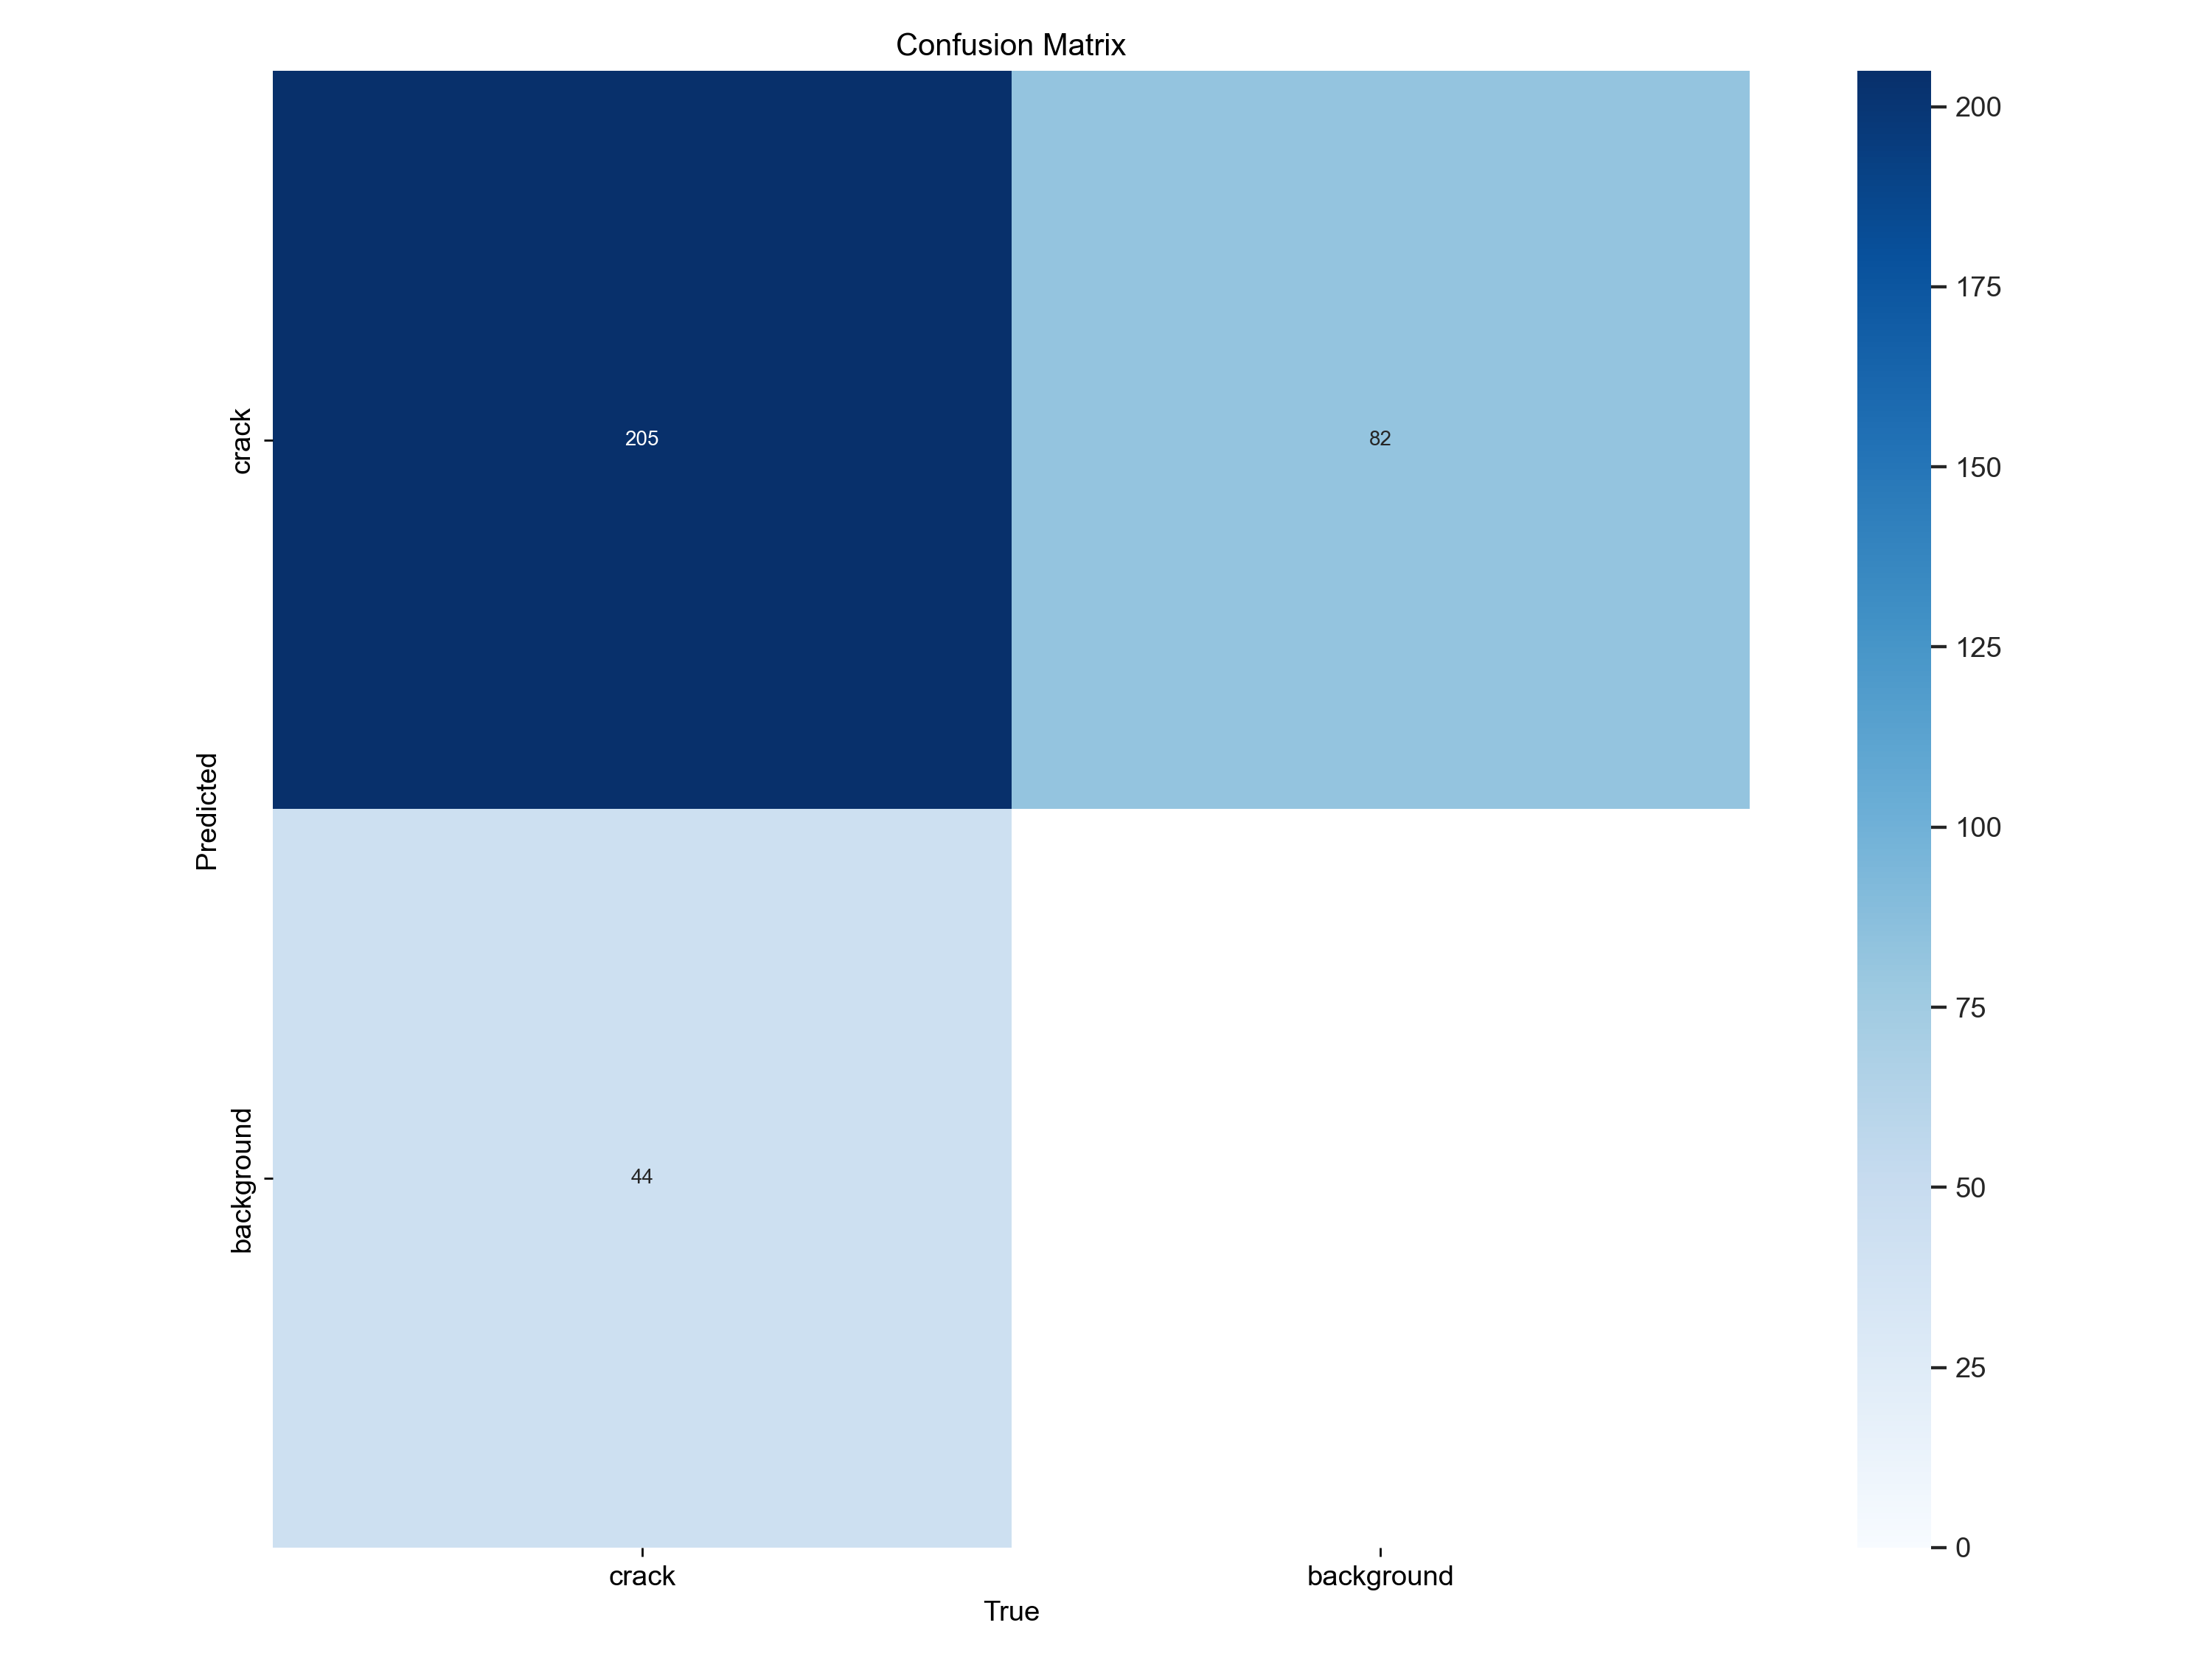

In [3]:
from IPython.display import Image

# Now use the Image class to display your image
Image(filename='runs\\detect\\train2\\confusion_matrix.png', width=600)

### **Training Results**

The following table shows the results of the training process. The table includes the following metrics:

- train/box_loss: Bounding Box loss is the loss associated with the bounding boxes of the objects detected in the training dataset.
- train/cls_loss: The classification loss during the training of an object detection model. There are typically two main components to the loss function: one for the bounding box (localization) and one for the class prediction (classification).
- train/dfl_loss: Focal Loss is a type of loss function designed to address the issue of class imbalance, where the number of examples in one class significantly outnumbers the examples in another.
- metrics/precision: Precision is the ratio of true positive predictions to the total number of positive predictions made by the model. It is a measure of the model's ability to avoid false positives.
- metrics/recall: Recall is the ratio of true positive predictions to the total number of actual positive instances in the dataset. It is a measure of the model's ability to avoid false negatives.
- val/box_loss: Bounding Box loss on the validation dataset.
- val/cls_loss: Classification loss on the validation dataset.
- val/dfl_loss: Focal Loss on the validation dataset.
- metrics/mAP_0.5: Mean Average Precision (mAP) is a metric used to evaluate the performance of object detection models. It is the average of the precision values at different recall levels.

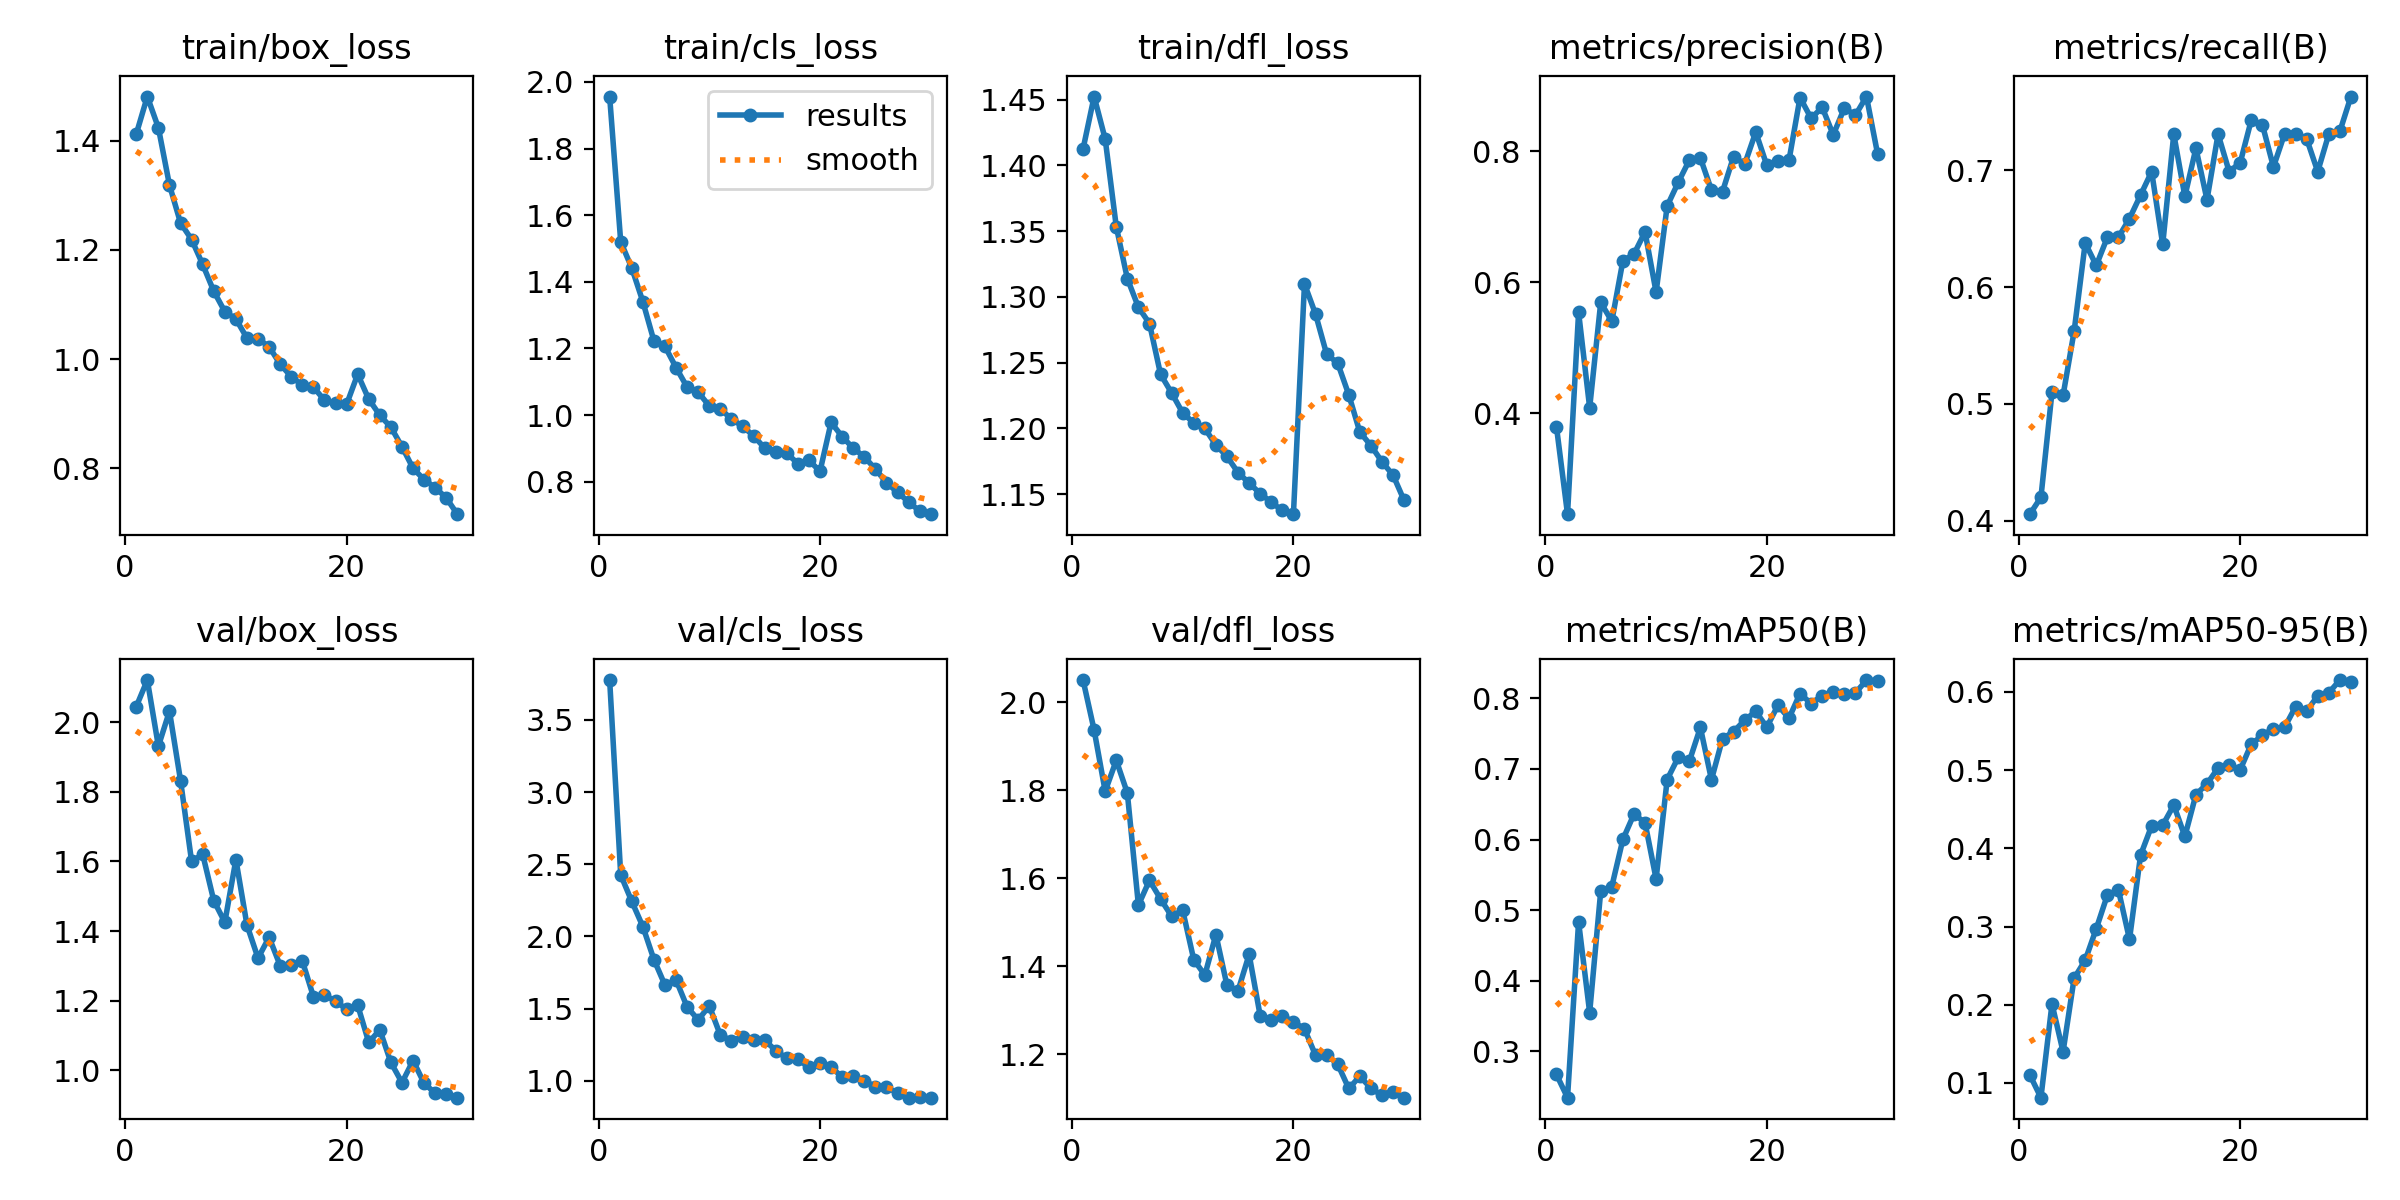

In [5]:
Image(filename='runs\\detect\\train2\\results.png', width=600)

### **Validation Results**

The following line displays the first batch of validation results. This provides a snapshot of the model's performance on the validation dataset after the first batch of images has been processed. The red bounding boxes indicate the predicted locations of cracks. Accompanying each bounding box is a confidence score, which represents the model's confidence in its prediction. The higher the confidence score, the more certain the model is that the object detected is a crack.

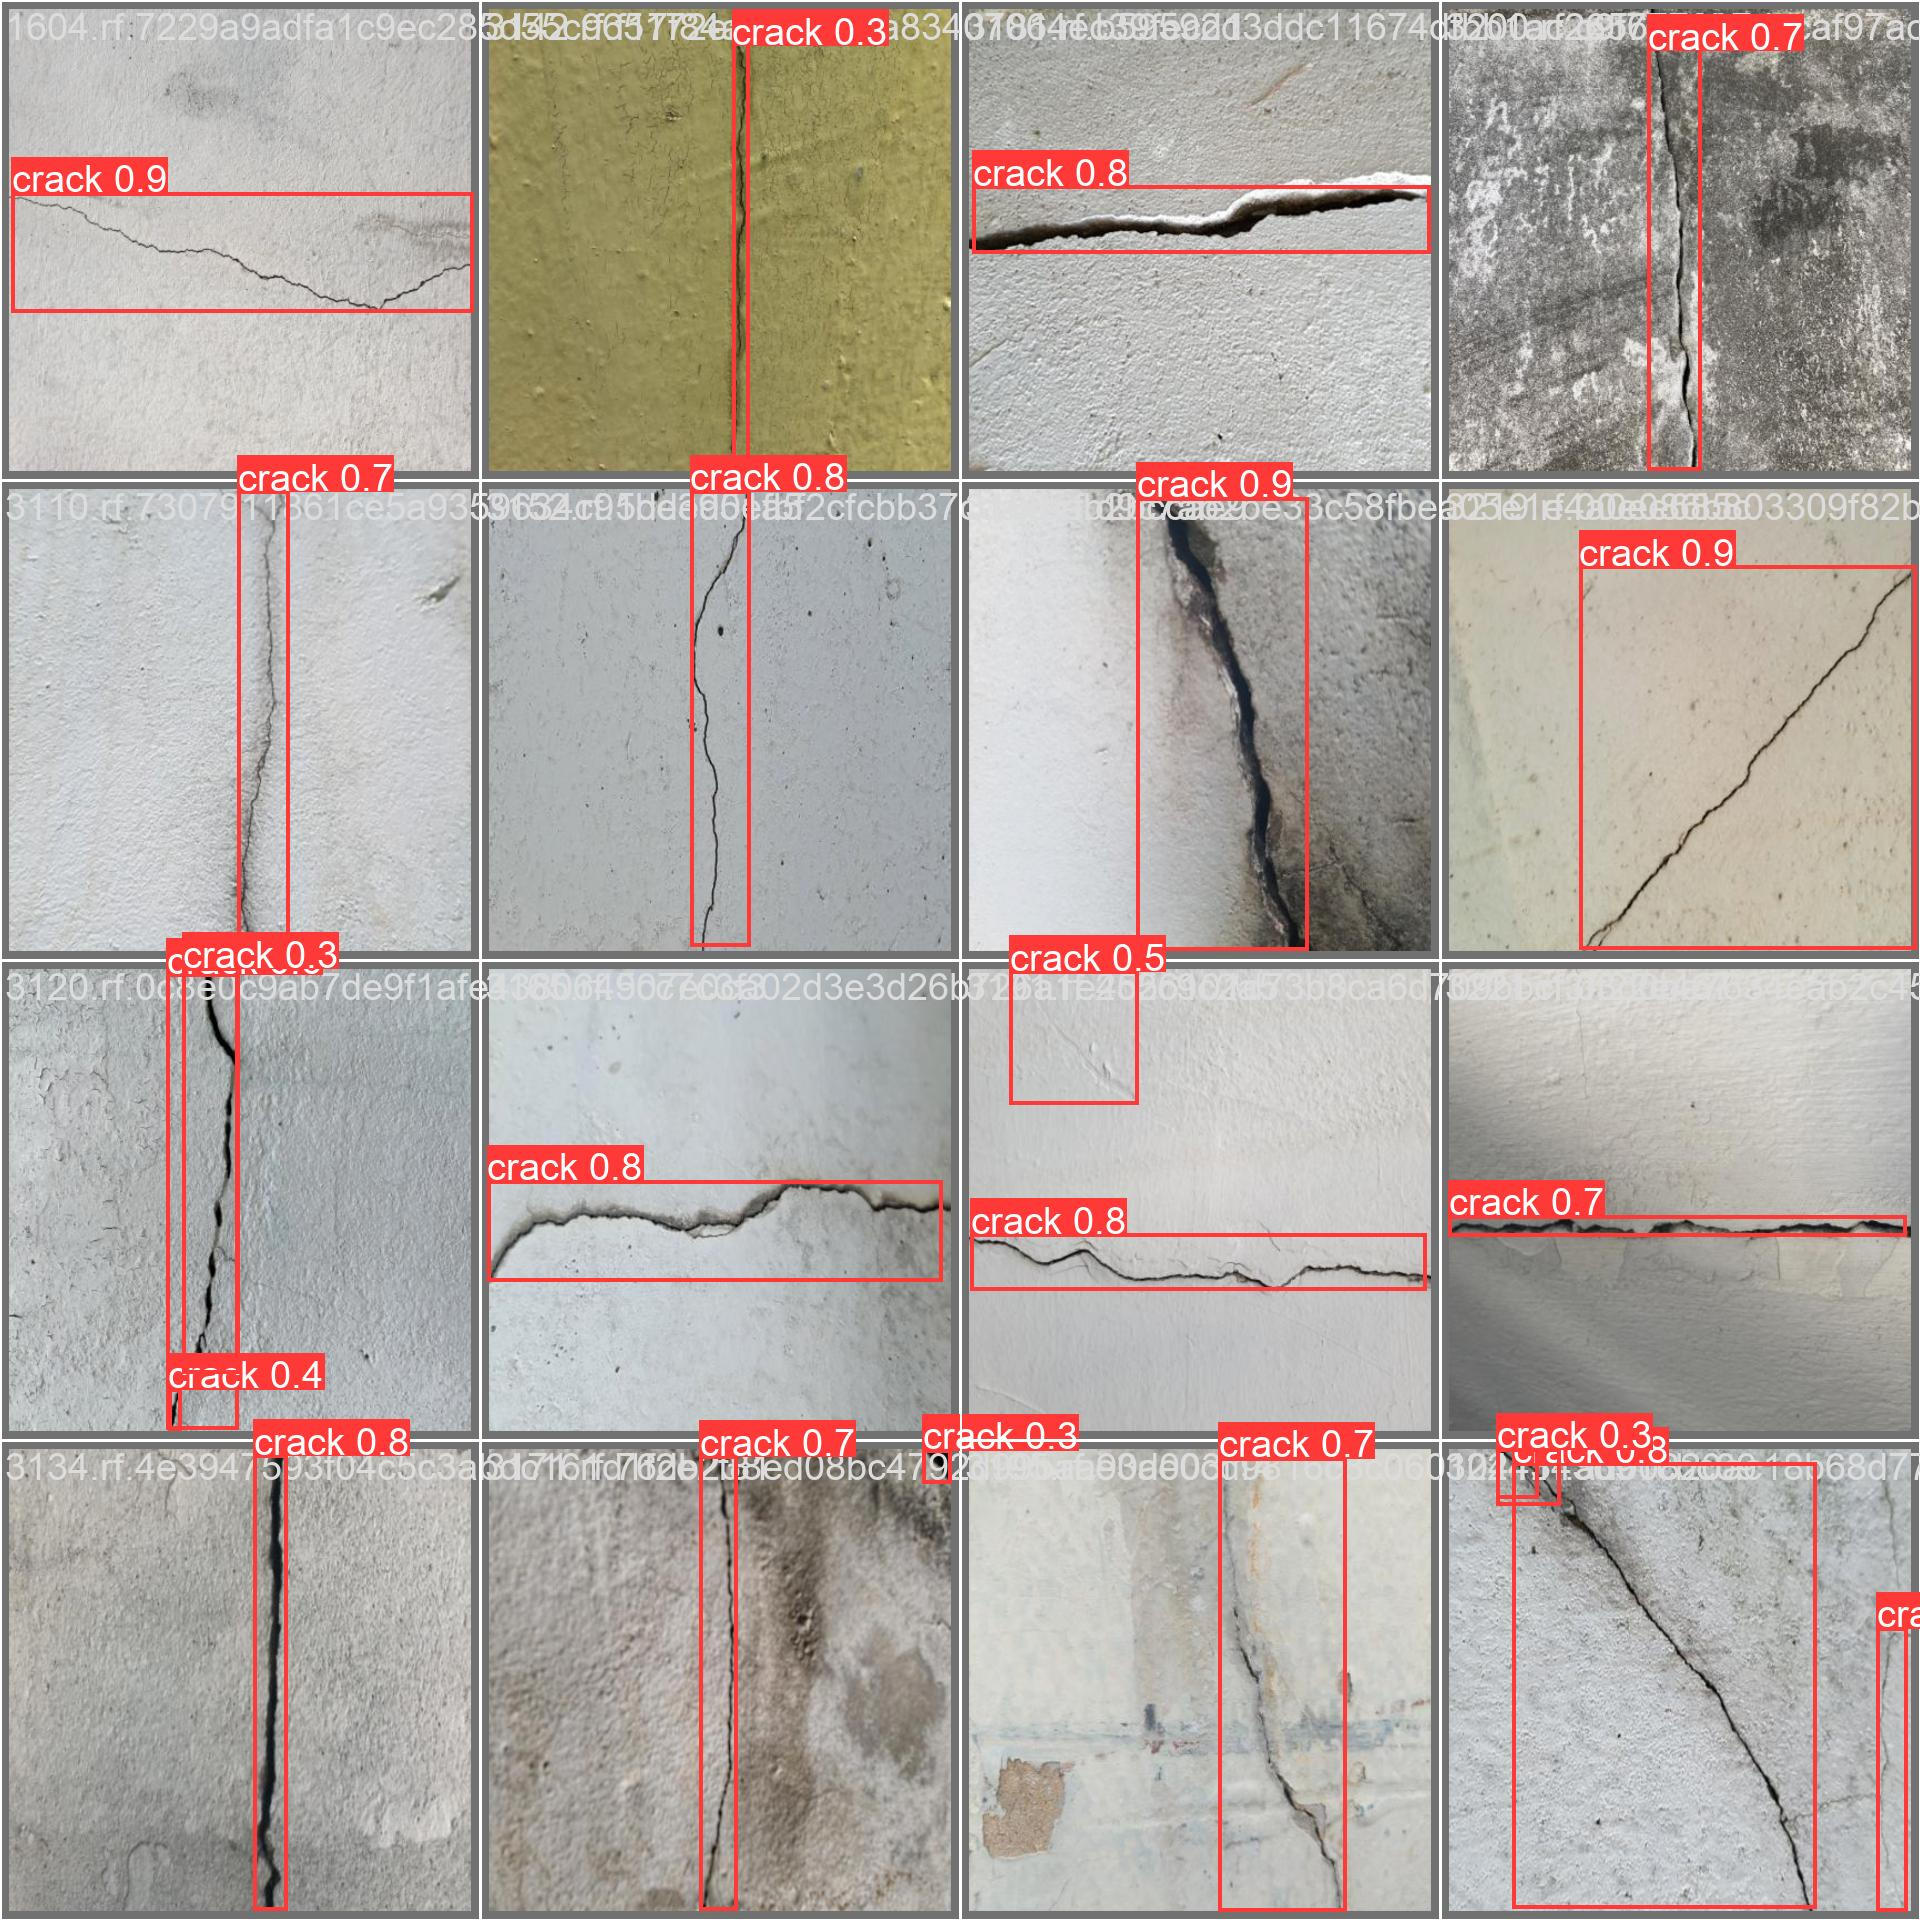

In [8]:
Image(filename='runs\\detect\\train2\\val_batch0_pred.jpg', width=600)

## **Validation of a Custom Model**

Validation in machine learning refers to the process of evaluating a model's performance using a separate dataset known as the validation set. This dataset is used during the model training phase to provide an unbiased evaluation of a model fit on the training dataset while tuning the model's parameters and architecture. Validation helps prevent overfitting, a common issue where a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data.

 The model used here, **`best.pt`** is the best-performing model based on previous training iterations, chosen to verify how well it performs on unseen data. This step is crucial for understanding the model’s effectiveness and ensuring that it generalizes well to new, similar data.

In [9]:
!yolo task=detect mode=val model=runs"\\detect\\train15\\weights\\best.pt" data="C:\\Users\\Marcus\\Desktop\\Share Folder\\Yolov8\\crack-2\\data.yaml"

Ultralytics YOLOv8.0.196  Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

val: Scanning C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\valid\labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]
val: Scanning C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\valid\labels.cache... 200 images, 1 backgrounds, 0 corrupt: 100%|██████████| 200/200 [00:00<?, ?it/s]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/13 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   8%|▊         | 1/13 [00:00<00:03,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  15%|█▌        | 2/13 [00:00<00:02,  4.05it/s]
                 Class     Images  Instances      Box(P          R      m

| Command Part                        | Explanation                                                                                         |
|-------------------------------------|-----------------------------------------------------------------------------------------------------|
| `!yolo`                             | This signifies a shell command in environments like Jupyter Notebooks. It invokes the YOLO CLI.    |
| `task=detect`                       | Specifies that the task to be performed is object detection.                                        |
| `mode=val`                          | Sets the mode to 'val', indicating that the model should be evaluated using the validation dataset. |
| `model=runs"\\detect\\train15\\weights\\best.pt"` | Specifies the model file to be used, indicating the best performing model saved during training.   |
| `data="C:\\Users\\Marcus\\Desktop\\Share Folder\\Yolov8\\crack-2\\data.yaml"` | Points to the data configuration file, which includes paths to the training and validation datasets, as well as class definitions. |

## **Inference with a Custom Model**

Inference in machine learning refers to the process of using a trained model to make predictions on new, unseen data. This phase follows the training and validation stages and involves applying the learned patterns or rules from the training data to derive insights or decisions from the new data. Inference is crucial because it demonstrates the model's practical utility in real-world applications, whether for predicting future events, classifying data, recognizing patterns, or any other task for which the model was designed.

In [10]:
!yolo task=detect mode=predict model="runs/detect/train15/weights/best.pt" conf=0.25 source="C:/Users/Marcus/Desktop/Share Folder/Yolov8/crack-2/test/images" save=True


Ultralytics YOLOv8.0.196  Python-3.10.11 torch-2.0.1+cu117 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\1616.rf.c868709931a671796794fdbb95352c5a.jpg: 800x800 1 crack, 6.0ms
image 2/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\1675.rf.e3aa3f8d28d0247ef0284dd46dacc29f.jpg: 800x800 1 crack, 7.0ms
image 3/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\1686.rf.809fb1b51c607e5cf787e44ef4ddd7b8.jpg: 800x800 1 crack, 7.5ms
image 4/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\1706.rf.011d213c21ec78896c36728dcbc156f5.jpg: 800x800 (no detections), 6.5ms
image 5/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\1716.rf.85ea38b36008beaa72c5d8541f734eb0.jpg: 800x800 2 cracks, 6.5ms
image 6/112 C:\Users\Marcus\Desktop\Share Folder\Yolov8\crack-2\test\images\172

| Command Part                          | Explanation                                                                                           |
|---------------------------------------|-------------------------------------------------------------------------------------------------------|
| `!yolo`                               | This indicates a shell command in environments like Jupyter Notebooks, calling the YOLO CLI.          |
| `task=detect`                         | Specifies that the task to be performed is object detection.                                          |
| `mode=predict`                        | Sets the mode to 'predict', indicating that the model should make predictions on the provided data.   |
| `model="runs/detect/train15/weights/best.pt"` | Specifies the model file to use, in this case, the 'best.pt' which represents the best-trained model. |
| `conf=0.25`                           | Sets the confidence threshold for predictions at 0.25. Predictions below this value will be ignored.  |
| `source="C:/Users/Marcus/Desktop/Share Folder/Yolov8/crack-2/test/images"`   | Specifies the location of the test images, where the model will apply its predictions.                |
| `save=True`                           | Indicates that the results of the predictions should be saved, likely including annotated images.     |

Visualizing a few results from the predictions made by the model on the test images.

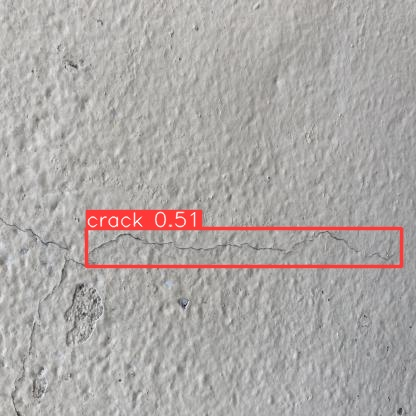

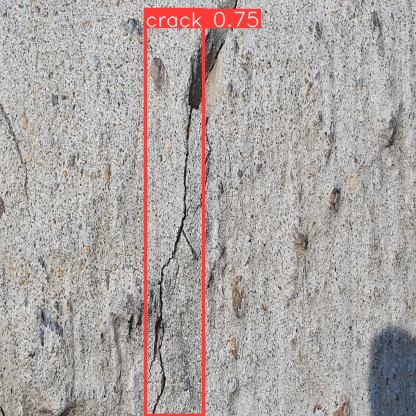

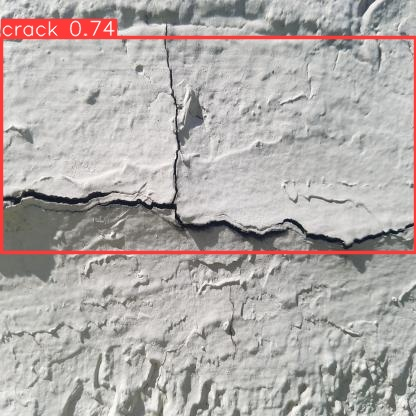

In [32]:
import glob
from IPython.display import Image, display

# Using forward slashes or double backslashes in the path
for image_path in glob.glob('runs/detect/predict4/*.jpg')[:3]:
    display(Image(filename=image_path, width=600))
    print("\n")


| Code Part                                             | Explanation |
|-------------------------------------------------------|-------------|
| `import glob`                                         | Imports the `glob` module, which is used to find all the pathnames matching a specified pattern according to the rules used by the Unix shell. |
| `from IPython.display import Image, display`          | Imports the `Image` class and `display` function from the `IPython.display` module, used for embedding images in Jupyter notebooks. |
| `for image_path in glob.glob('C*.jpg')[:3]` | Starts a loop over the first three JPEG files found in the directory `for image_path in glob.glob('runs/detect/predict4/*.jpg')[:3]`. The `glob.glob` function retrieves a list of file paths matching the pattern, and `[:3]` slices the list to include only the first three items. |
| `display(Image(filename=image_path, width=600))`      | Inside the loop, this line creates an `Image` object for each `image_path` and displays it in the notebook with a width of 600 pixels. The `display` function is used to render the image in the output cell of the notebook. |
| `print("\n")`                                         | This line prints a newline character after each image to ensure there is space between consecutive images. This makes the output look cleaner and more organized in the notebook. |


### **Model Deployment**

Lastly, we implement the model within a Python script to allow for easy execution and integration into our application. We have saved the most recent version of the model as `crack-detect-v3.pt`. This model will be used with OPENCV, in our `crack-detect.py` script to detect cracks on a live video feed. 

In [ ]:
from ultralytics import YOLO 
import cv2 
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    device = torch.device("cuda")
else:
    print("CUDA is not available, using CPU instead.")
    device = torch.device("cpu")

model = YOLO("crack-detect-v3.pt").to(device)
model.predict(source="0", show=True, conf=0.5)

| Code Line | Explanation |
|-----------|-------------|
| `from ultralytics import YOLO` | Imports the `YOLO` class from the Ultralytics library. |
| `import cv2` | Imports OpenCV, a library used for computer vision tasks. |
| `import torch` | Imports PyTorch, a machine learning library used as the backend for the YOLO model. |
| `if torch.cuda.is_available():` | Checks if CUDA is available on the system (CUDA is Nvidia's API for GPU acceleration). |
| `print("CUDA is available!")` | Prints a message to the console if CUDA is available. |
| `device = torch.device("cuda")` | Sets the device to GPU to utilize CUDA for computations. |
| `print("CUDA is not available, using CPU instead.")` | Prints a message to the console if CUDA is not available. |
| `device = torch.device("cpu")` | Sets the device to CPU for computations if CUDA is not available. |
| `model = YOLO("crack-detect-v3.pt").to(device)` | Loads the YOLO model from the specified `.pt` file and assigns it to the appropriate device (CPU or GPU). |
| `model.predict(source="0", show=True, conf=0.5)` | Calls the `predict` method on the model to perform detection on the specified source (likely the default webcam since the source is `"0"`), displays the predictions (`show=True`), and sets the confidence threshold to 0.5. |

This script is designed to initialize a YOLO model for crack detection and run predictions on a video source with a certain confidence threshold, while taking advantage of GPU acceleration if available.